Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model  # will be using for plotting trend line
from sklearn.preprocessing import MinMaxScaler # for normalizing data
from sklearn.cluster import KMeans 
%matplotlib inline

Reading the dataset

In [2]:
data = pd.read_csv('data.csv')
data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


### Differentiate Genere

In [4]:
# lets perform clustering
# data(columns) we will we using
song_features = pd.DataFrame()
# normalizer instance
scaler = MinMaxScaler()
for col in data.iloc[:,:-1].columns:      # excluding year col i.e, of int64 type
    if data[col].dtypes in ['float64', 'int64']:
        # adding normalized col
        scaler.fit(data[[col]])
        song_features[col] = scaler.transform(data[col].values.reshape(-1,1)).ravel()

In [5]:
# first we would like to know that how many cluster or to say Genres can be clustered 
# with less SSE(Sum of Squared Error) we will use "Elbow method" to find out 

# KMeans instance
km = KMeans()
k_rng = range(1,200)  # k value
sse = [] # sse value for each k
for i in k_rng:
    km = KMeans(n_clusters = i)
    km.fit(song_features.sample(1000))
    # calculating sse
    sse.append(km.inertia_) 
    
# due to less computation power I am unable to use whole data 
# I guess 1000 sample of whole data can depict actual

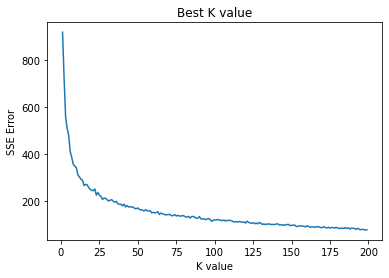

In [6]:
plt.plot(k_rng,sse)
plt.xlabel('K value')
plt.ylabel('SSE Error')
plt.title('Best K value')
# plt.ylim(0,400)
# plt.xlim(0,100)
plt.show()

In [7]:
# looks like 25 is good value of K
km = KMeans(n_clusters=25)
predicted_genres = km.fit_predict(song_features)

In [8]:
song_features['predicted_genres'] = predicted_genres
song_features['predicted_genres'] = song_features['predicted_genres'].apply(lambda x: 'Genre'+ str(x))


In [9]:
song_features.sample(15)


,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,predicted_genres
164952,0.512048,0.336032,0.056659,0.4780,0.0,0.000777,0.727273,0.3340,0.742307,0.0,0.29,0.095769,0.298311,0.4790,Genre2
137702,0.967871,0.164980,0.040903,0.0952,0.0,0.835000,0.636364,0.2040,0.648219,1.0,0.12,0.039835,0.260284,0.1140,Genre21
70596,0.039157,0.320850,0.037114,0.5450,0.0,0.000000,1.000000,0.1160,0.838791,0.0,0.66,0.048400,0.569517,0.1400,Genre10
99605,0.991968,0.268219,0.036895,0.0836,0.0,0.000000,0.818182,0.3020,0.724548,1.0,0.00,0.038803,0.314739,0.2450,Genre16
73161,0.079819,0.385628,0.165582,0.7820,0.0,0.750000,0.181818,0.9500,0.778451,1.0,0.19,0.046027,0.413174,0.6490,Genre24
81386,0.996988,0.548583,0.055196,0.0711,0.0,0.929000,0.454545,0.0987,0.597056,0.0,0.33,0.050568,0.604049,0.2500,Genre19
707,0.996988,0.383603,0.006486,0.3960,0.0,0.953000,0.181818,0.0845,0.700525,1.0,0.00,0.043240,0.419282,0.4910,Genre9
65285,0.654618,0.690283,0.159450,0.1100,0.0,0.000000,0.272727,0.0444,0.651178,1.0,0.23,0.861713,0.525611,0.2280,Genre22
21497,0.348394,0.559717,0.053117,0.6060,0.0,0.007200,0.727273,0.0992,0.790917,1.0,0.35,0.039319,0.647422,0.7430,Genre5
48092,0.997992,0.627530,0.029063,0.2350,0.0,0.880000,0.818182,0.1490,0.796288,1.0,0.00,0.045614,0.492882,0.6100,Genre7


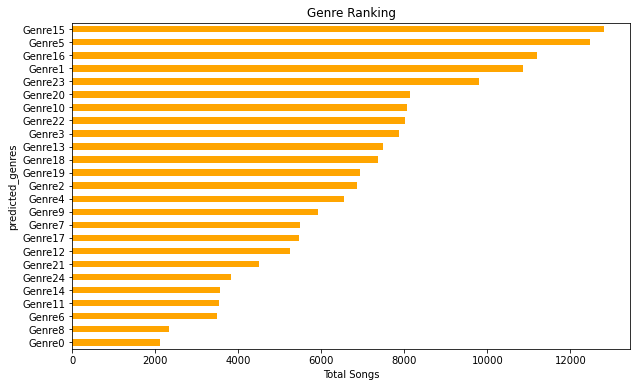

In [10]:
# lets see how many songs falls in each Genre and which Genre have more songs
genres_grp = song_features.groupby(['predicted_genres']).size()
plt.figure(figsize=(10,6))
genres_grp.sort_values(ascending=True).plot.barh(color='orange')
plt.xlabel('Total Songs')
plt.title('Genre Ranking')
plt.show()
